## <center>회귀분석 2 HW04</center>

**<p style="text-align:right;font-size:15px">202014107 <br> 통계학과 <br> 강신성</p>**

### CH15, 16

In [1]:
library(leaps)
par(family = "NanumGothic")
setwd("~/R/regression analysis/data/")
options(repr.plot.width = 16, repr.plot.height = 9)

**<p style="font-size:15px;text-indent:-15px;padding-left:15px">  1. 중학교 2학년 학생 중에서 15명을 임의로 추출하여 각 학생의 악력($kg$), 신장($cm$), 체중($kg$)과 원반던지기에서 던진 거리($m$)를 측정하여 다음의 데이터를 얻었다.</p>**

|학생번호|$x_1$(악력)|$x_2$(신장)|$x_3$(체중)|$y$(원반던지기 거리)|
|:-:|:-:|:-:|:-:|:-:|
|1|28|146|34|22|
|2|47|169|57|36|
|3|39|160|38|24|
|4|25|156|28|22|
|5|34|161|37|27|
|6|29|168|50|29|
|7|38|154|54|26|
|8|23|153|40|23|
|9|52|160|62|31|
|10|37|152|39|25|
|11|35|155|46|23|
|12|39|154|54|27|
|13|38|157|57|31|
|14|32|162|53|25|
|15|25|142|32|23|

In [2]:
## create dataframe
dt = data.frame(x1 = c(28,47,39,25,34,29,38,23,52,37,35,39,38,32,25),
                x2 = c(146,169,160,156,161,168,154,153,160,152,155,154,157,162,142),
                x3 = c(34,57,38,28,37,50,54,40,62,39,46,54,57,53,32),
                y = c(22,36,24,22,27,29,26,23,31,25,23,27,31,25,23))

<p style="padding-left:30px;text-indent:-15px">(1) $x_3$를 설명변수로 하고, $y$를 반응변수로 하여 회귀직선을 적합시키고, $$h_{ii}, r_i, r_i^*, DFFITS(i), D(i), COVRATIO(i)$$ 를 모두 구하여 이상치가 있는지, 어떤 것이 영향을 크게 주는 측정값인지를 판정하시오.</p>

`-` 회귀직선 적합

$$y_i = \beta_0 + \beta_3 x_{i3} + \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2), ~ i = 1, 2, \cdots, 15$$

In [3]:
n = nrow(dt)
p = 1

In [4]:
reg_model1 = lm(y~x3, dt)
summary(reg_model1)


Call:
lm(formula = y ~ x3, data = dt)

Residuals:
   Min     1Q Median     3Q    Max 
-3.453 -1.727 -0.042  1.068  6.396 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.20655    3.15279   4.189 0.001061 ** 
x3           0.28767    0.06774   4.247 0.000953 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.692 on 13 degrees of freedom
Multiple R-squared:  0.5811,	Adjusted R-squared:  0.5489 
F-statistic: 18.04 on 1 and 13 DF,  p-value: 0.0009527


`-` $h_{ii}, r_i, r_i^*, DFFITS(i), D(i), COVRATIO(i)$값 계산

In [5]:
h_ii = hatvalues(reg_model1)  ## 1/n + (dt$x3 - mean(dt$x3))^2/sum((dt$x3 - mean(dt$x3))^2)
stand_res = rstandard(reg_model1)
stud_res = rstudent(reg_model1)
DFFITS_i = dffits(reg_model1)
cooks_d = cooks.distance(reg_model1)
cov_ratio = covratio(reg_model1)

`-` 지렛대점 판별($h_{ii}$)

In [6]:
2*(p+1)/n

[1] 0.2666667

In [7]:
which(h_ii >= 2*(p+1)/n)

named integer(0)

> 지렛대점은 없다.

`-` 이상치 판별($r_i, r_i^*$)

$$|r_i^*| ≥ t_{\alpha/2}(n-p-2)$$

In [8]:
which(abs(stand_res) >= 2)

2 
2

In [9]:
qt(0.975, n-p-2)

[1] 2.178813

In [10]:
which(abs(stud_res) >= qt(0.975, n-p-2))

2 
2

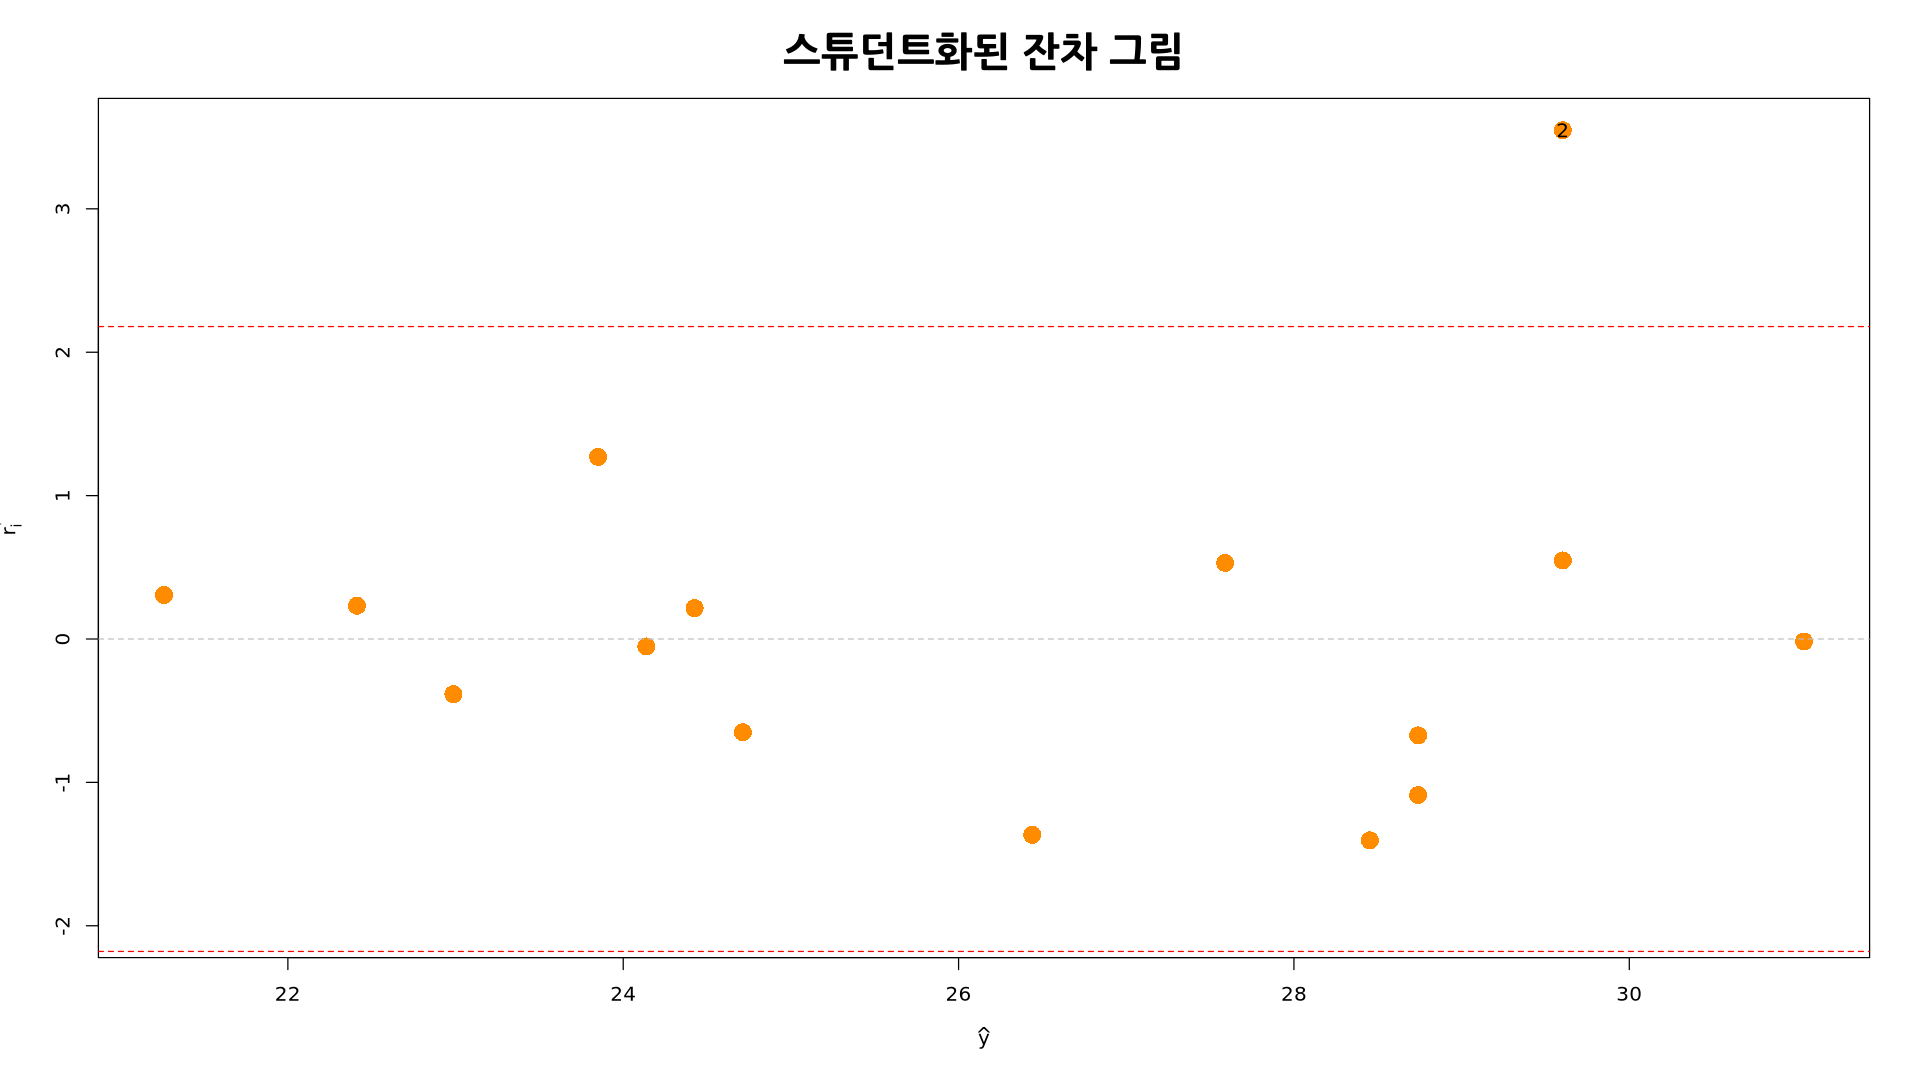

In [11]:
plot(fitted(reg_model1), rstudent(reg_model1),
    pch = 16, cex = 2, col = "darkorange",
    ylim = c(min(-2, min(rstudent(reg_model1))),
          max(2, max(rstudent(reg_model1)))),
    main = "스튜던트화된 잔차 그림", cex.main = 2,
    xlab = expression(hat(y)), ylab = expression(r[i]^"*"))
abline(h = c(qt(0.025, n-p-2), 0, qt(0.975, n-p-2)), col = c("red", "grey", "red"), lty = 2)
text(fitted(reg_model1)[which(abs(stud_res) >= qt(0.975, n-p-2))],
     stud_res[which(abs(stud_res) >= qt(0.975, n-p-2))],
     which(abs(stud_res) >= qt(0.975, n-p-2)))

> (내적) 표준화된 잔차 및 (외적) 스튜던트화된 잔차 값에 대하여 유의수준 $\alpha = 0.05$수준에서 이상치 여부를 검정한 결과 2번째 측정값이 이상치임을 확인할 수 있다.

`-` 영향점 판별($DFFITS(i), D(i), COVRATIO(i)$)

In [12]:
## DFFITS 기각역
2*sqrt((p+1)/(n-p-1))

[1] 0.7844645

In [13]:
which(abs(DFFITS_i) >= 2*sqrt((p+1)/(n-p-1)))

2 
2

> $DFFITS(i)$ 관점에서는 2번째 관측치가 영향점이 된다.

In [14]:
## cook's distance 기각역
qf(0.5, p+1, n-p-1)

[1] 0.7314546

In [15]:
which(cooks_d >= qf(0.5, p+1, n-p-1))

named integer(0)

In [16]:
which(cooks_d == max(cooks_d))
cooks_d[2]

2 
2

2 
0.5958452

> $D(i)$ 관점에서는 영향점이 존재하지 않았으나, 해당 값이 가장 큰 것이 2번째 관측치로 나타났다.

In [17]:
## COVRATIO 기각역
3*(p+1)/n

[1] 0.4

In [18]:
which(abs(cov_ratio-1) >= 3*(p+1)/n)

2  4  9 15 
 2  4  9 15

> $COVRATIO(i)$ 관점에서는 네 개의 관측치가 영향점으로 나타났다.

In [19]:
influence.measures(reg_model1)

Influence measures of
	 lm(formula = y ~ x3, data = dt) :

     dfb.1_   dfb.x3    dffit cov.r   cook.d    hat inf
1  -0.14025  0.11948 -0.16075 1.346 1.38e-02 0.1489    
2  -0.87752  1.12451  1.50138 0.330 5.96e-01 0.1519   *
3  -0.01307  0.01020 -0.01744 1.305 1.65e-04 0.1013    
4   0.17271 -0.15624  0.18139 1.558 1.77e-02 0.2583   *
5   0.35443 -0.28474  0.44954 1.026 9.65e-02 0.1113    
6  -0.03097  0.06405  0.15659 1.218 1.30e-02 0.0801    
7   0.17826 -0.25025 -0.38961 1.096 7.48e-02 0.1135    
8  -0.12883  0.09239 -0.19840 1.197 2.06e-02 0.0851    
9   0.00691 -0.00824 -0.00969 1.546 5.08e-05 0.2411   *
10  0.04844 -0.03645  0.06888 1.283 2.56e-03 0.0926    
11 -0.05967 -0.02135 -0.36571 0.942 6.27e-02 0.0669    
12  0.11002 -0.15445 -0.24046 1.230 3.02e-02 0.1135    
13 -0.13549  0.17362  0.23181 1.317 2.84e-02 0.1519    
14  0.19215 -0.28354 -0.47641 0.965 1.06e-01 0.1032    
15  0.09900 -0.08652  0.10898 1.419 6.40e-03 0.1803    

<p style="padding-left:30px;text-indent:-15px">(2) $x_1, x_2, x_3$를 모두 사용하여 $y$에 대한 중회귀모형을 적합시키고, $$h_{ii}, r_i, r_i^*, DFFITS(i), D(i), COVRATIO(i)$$ 를 모두 구하여 이상치가 있는지, 어떤 것이 영향을 크게 주는 측정값인지를 판정하시오.</p>

`-` 회귀모형 적합

$$\bf y = \bf X \boldsymbol \beta + \boldsymbol \epsilon, ~ \boldsymbol \epsilon \sim N(\bf 0, \bf I \sigma^2)$$

In [20]:
n = nrow(dt)
p = 3

In [21]:
reg_model2 = lm(y~., dt)
summary(reg_model2)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0723 -1.0869 -0.0208  0.9365  3.8745 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -15.78431   14.50462  -1.088   0.2998  
x1            0.15684    0.11331   1.384   0.1937  
x2            0.19620    0.10215   1.921   0.0811 .
x3            0.12948    0.09083   1.425   0.1818  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.331 on 11 degrees of freedom
Multiple R-squared:  0.7342,	Adjusted R-squared:  0.6617 
F-statistic: 10.13 on 3 and 11 DF,  p-value: 0.001699


`-` $h_{ii}, r_i, r_i^*, DFFITS(i), D(i), COVRATIO(i)$값 계산

In [22]:
h_ii = hatvalues(reg_model2)
stand_res = rstandard(reg_model2)
stud_res = rstudent(reg_model2)
DFFITS_i = dffits(reg_model2)
cooks_d = cooks.distance(reg_model2)
cov_ratio = covratio(reg_model2)

`-` 지렛대점 판별($h_{ii}$)

In [23]:
2*(p+1)/n

[1] 0.5333333

In [24]:
which(h_ii >= 2*(p+1)/n)

named integer(0)

> 지렛대점은 없다.

`-` 이상치 판별($r_i, r_i^*$)

$$|r_i^*| ≥ t_{\alpha/2}(n-p-2)$$

In [25]:
which(abs(stand_res) >= 2)

2 
2

In [26]:
qt(0.975, n-p-2)

[1] 2.228139

In [27]:
which(abs(stud_res) >= qt(0.975, n-p-2))

2 
2

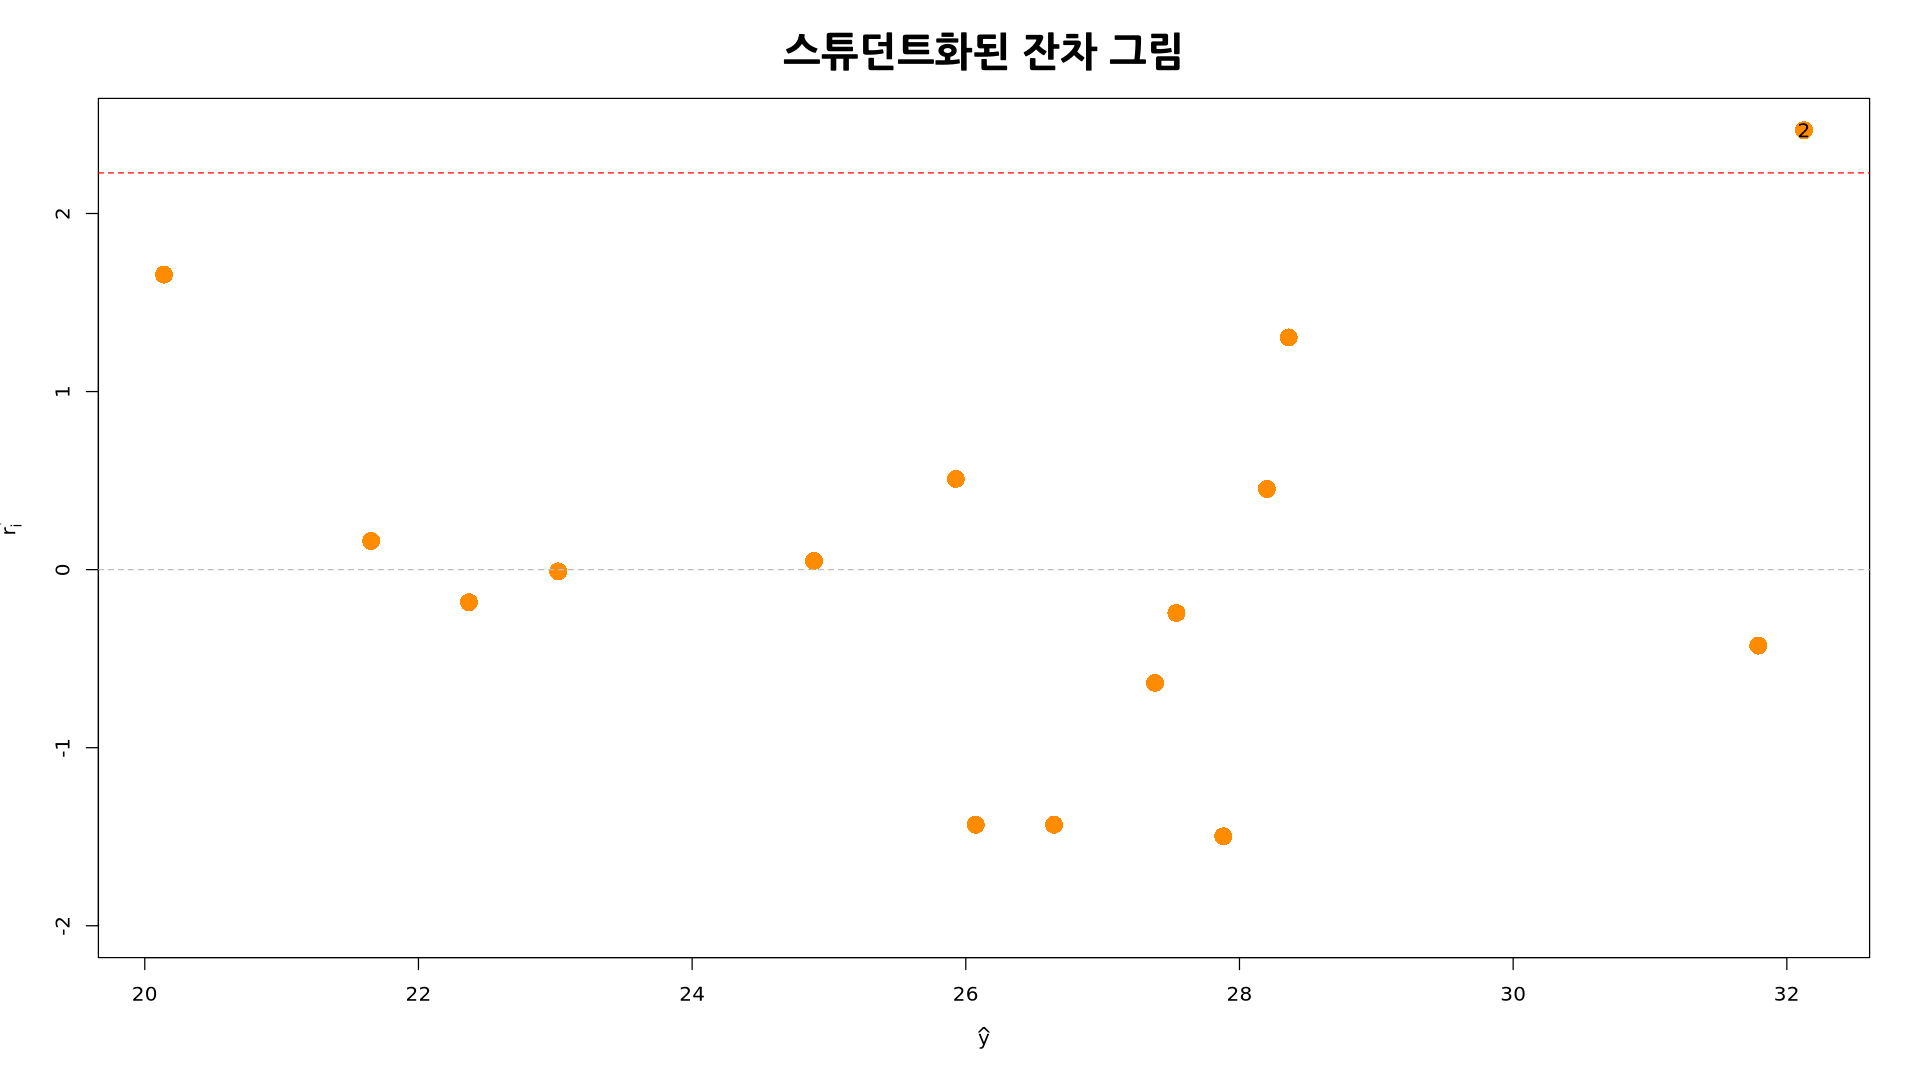

In [28]:
plot(fitted(reg_model2), rstudent(reg_model2),
    pch = 16, cex = 2, col = "darkorange",
    ylim = c(min(-2, min(rstudent(reg_model2))),
          max(2, max(rstudent(reg_model2)))),
    main = "스튜던트화된 잔차 그림", cex.main = 2,
    xlab = expression(hat(y)), ylab = expression(r[i]^"*"))
abline(h = c(qt(0.025, n-p-2), 0, qt(0.975, n-p-2)), col = c("red", "grey", "red"), lty = 2)
text(fitted(reg_model2)[which(abs(stud_res) >= qt(0.975, n-p-2))],
     stud_res[which(abs(stud_res) >= qt(0.975, n-p-2))],
     which(abs(stud_res) >= qt(0.975, n-p-2)))

표준화된 잔차와 스튜던트화된 잔차에 대하여 유의수준 $\alpha = 0.05$에서 이상치 여부를 확인한 결과, 2번째 관측치가 이상치로 판별되었다.

`-` 영향점($DFFITS(i), D(i), COVRATIO(i)$)

In [29]:
## DFFITS(i)
2*sqrt((p+1)/(n-p-1))

[1] 1.206045

In [30]:
which(abs(DFFITS_i) >= 2*sqrt((p+1)/(n-p-1)))

2 15 
 2 15

> $DFFITS(i)$를 기준으로는 2번째 관측치와 15번째 관측치가 영향점으로 판별되었다.

In [31]:
## Cook's distance
qf(0.5, p+1, n-p-1)

[1] 0.893157

In [32]:
which(cooks_d >= qf(0.5, p+1, n-p-1))

named integer(0)

In [33]:
which(cooks_d == max(cooks_d))
max(cooks_d)

2 
2

[1] 0.5279998

> $D(i)$를 기준으로는 영향점이 존재하지 않는다. 2번째 관측치의 cooks_d 값이 가장 높게 드러났다.

In [34]:
## COVRATIO(i)
3*(p+1)/n

[1] 0.8

In [35]:
cov_ratio

1         2         3         4         5         6         7         8 
1.8805694 0.3292995 1.0098428 2.1223431 1.7365333 2.5331163 1.5177705 1.9843334 
        9        10        11        12        13        14        15 
2.3248783 1.8069906 0.7484534 1.7324061 0.9734517 0.8596426 0.8738053

In [36]:
which(abs(cov_ratio-1) >= 3*(p+1)/n)

1  4  6  8  9 10 
 1  4  6  8  9 10

> $COVRATIO(i)$를 기준으로는 1, 4, 6, 8, 9, 10번째 관측치가 영향점인 것으로 드러났다.

In [37]:
influence.measures(reg_model2)

Influence measures of
	 lm(formula = y ~ ., data = dt) :

     dfb.1_    dfb.x1    dfb.x2   dfb.x3    dffit cov.r   cook.d    hat inf
1   0.06276  0.003172 -0.051979 -0.01524  0.08789 1.881 2.12e-03 0.2295    
2  -1.16230  0.718336  0.991882 -0.33074  1.75761 0.329 5.28e-01 0.3366   *
3   0.33885 -0.651274 -0.373479  0.81332 -0.96627 1.010 2.13e-01 0.3127    
4   0.03354  0.006477 -0.054915  0.08047 -0.12563 2.122 4.33e-03 0.3194   *
5  -0.15165  0.089922  0.176110 -0.21353  0.28547 1.737 2.18e-02 0.2390    
6  -0.27769 -0.282407  0.295171  0.12463  0.42407 2.533 4.85e-02 0.4671   *
7  -0.14811  0.031804  0.168104 -0.18788 -0.29442 1.518 2.29e-02 0.1767    
8  -0.00101  0.004789  0.000255 -0.00243 -0.00592 1.984 9.62e-06 0.2622    
9  -0.03420 -0.223389  0.088252 -0.02987 -0.35865 2.325 3.47e-02 0.4141   *
10  0.00839  0.016332 -0.007445 -0.01414  0.02405 1.807 1.59e-04 0.1906    
11 -0.12753 -0.009197  0.117770 -0.05558 -0.40259 0.748 3.70e-02 0.0732    
12 -0.05727 -0.000857  0.06588

**<p style="font-size:15px;text-indent:-15px;padding-left:15px">  2. "HW4_dt1.csv" 다음의 데이터는 Helms (1974)에서 수집한 것으로 변수는 다음과 같다.</p>**

$y = $ change of rut depth in inches/million whell passes

$x_1 = $ viscosity of asphalt

$x_2 = $ percentage of asphalt in surface course

$x_3 = $ percentage of asphalt in base course

$x_4 = $ indicator variable to separate two sets of runs

$x_5 = $ percentage of fines in surface course

$x_6 = $ percentage of voids in surface course

**<p style="font-size:15px;padding-left:15px">네 번째의 가변수는 다음에 실려 있는 31개의 데이터를 얻을 때 처음의 16개와 뒤의 15개가 시간상 차이를 두고 얻어졌으므로 이를 구분하기 위해 나타낸 변수이다. 처음의 16개의 데이터는 $x_4 = -1$로 하고, 나중 15개는 $x_4 = 1$로 하여 주었다. $y$와 $x_1$을 로그변환하여 분석한다. 다음 물음에 답하여라.</p>**

<p style="padding-left:30px;text-indent:-15px">(1) 중회귀모형을 적합하여라. (주의 : $x_4$는 범주형 변수이다.)</p>

`-` 중회귀모형

$$\bf y = \bf X \boldsymbol{\beta} + \boldsymbol{\epsilon}, ~ \boldsymbol{\epsilon} \sim N(\bf 0, \bf I \sigma^2), ~ r(X) = p+1 ≤ n $$

In [38]:
passes = read.csv("HW4_dt1.csv")[, -1]  ## except index
head(passes)

,x1,x2,x3,x4,x5,x6,y
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2.8,4.68,4.87,-1,8.4,4.916,6.75
2,1.4,5.19,4.50,-1,6.5,4.563,13.00
3,1.4,4.82,4.73,-1,7.9,5.321,14.75
4,3.3,4.85,4.78,-1,8.3,4.865,12.60
5,1.7,4.86,4.95,-1,8.4,3.776,8.25
6,2.9,5.16,4.45,-1,7.4,4.397,10.37


In [182]:
n = nrow(passes)
p = 6

In [39]:
full_model = lm(y~., passes)
summary(full_model)


Call:
lm(formula = y ~ ., data = passes)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5047 -2.4378 -0.2282  1.3777 11.1766 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -60.116078  40.917534  -1.469 0.154766    
x1           -0.002303   0.008911  -0.258 0.798266    
x2            7.456602   4.517129   1.651 0.111819    
x3            6.034040   5.448471   1.107 0.279066    
x4           -4.590567   1.077747  -4.259 0.000273 ***
x5            0.481873   1.337381   0.360 0.721766    
x6           -0.385794   1.909359  -0.202 0.841577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.45 on 24 degrees of freedom
Multiple R-squared:  0.6516,	Adjusted R-squared:  0.5645 
F-statistic:  7.48 on 6 and 24 DF,  p-value: 0.0001342


<p style="padding-left:30px;text-indent:-15px">(2) 변수들간의 상관계수를 구하여라.</p>

In [40]:
cor(passes)

,x1,x2,x3,x4,x5,x6,y
x1,1.0000000,-0.1327245,-0.19370832,0.6129692,-0.2294243,0.48240594,-0.5573571
x2,-0.1327245,1.0000000,-0.26412339,0.0422776,-0.1376387,-0.43177111,0.1821302
x3,-0.1937083,-0.2641234,1.00000000,-0.1295109,0.4419814,-0.02722774,0.2163164
x4,0.6129692,0.0422776,-0.12951093,1.0000000,-0.2520514,0.38636158,-0.7542258
x5,-0.2294243,-0.1376387,0.44198140,-0.2520514,1.0000000,0.11594618,0.2691952
x6,0.4824059,-0.4317711,-0.02722774,0.3863616,0.1159462,1.00000000,-0.4230474
y,-0.5573571,0.1821302,0.21631638,-0.7542258,0.2691952,-0.42304743,1.0000000


<p style="padding-left:30px;text-indent:-15px">(3) 설명변수 6개를 모두 사용한 완전모형(full model)에 대한 분산분석표를 작성하고 $\alpha = 0.05$에서 선형회귀모형의 유의성을 검정하시오.</p>

In [41]:
null_model = lm(y~1, passes)
anova(null_model, full_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,30,1364.108,NA,NA,NA,NA
2,24,475.286,6,888.8218,7.48031,0.0001342281


ⅰ) 가설 $H_0 : \beta_1 = \beta_2 = \cdots = \beta_6 = 0 ~ vs. ~ H_1 : not ~ H_0$

ⅱ) 검정통계량 $$F_0 = \frac{MSR}{MSE} \underset{H_0}{\sim} F(p, ~ n-p-1)$$

ⅲ) 검정통계량의 관측치와 p-value

$$f_0 = 7.48031, ~ P_{H_0}(F ≥ f_0) = 0.00013 < \alpha = 0.05$$

> 따라서 유의수준 $\alpha = 0.05$에서 귀무가설을 기각하고 대립가설을 수용한다. 즉, 적합된 선형회귀모형은 유의하다.

<p style="padding-left:30px;text-indent:-15px">(4) 상관계수들을 보고 변수를 하나만 선택할 때에는 어떤 변수가 선택될 것인지를 말하시오.</p>

In [42]:
cor(passes)

,x1,x2,x3,x4,x5,x6,y
x1,1.0000000,-0.1327245,-0.19370832,0.6129692,-0.2294243,0.48240594,-0.5573571
x2,-0.1327245,1.0000000,-0.26412339,0.0422776,-0.1376387,-0.43177111,0.1821302
x3,-0.1937083,-0.2641234,1.00000000,-0.1295109,0.4419814,-0.02722774,0.2163164
x4,0.6129692,0.0422776,-0.12951093,1.0000000,-0.2520514,0.38636158,-0.7542258
x5,-0.2294243,-0.1376387,0.44198140,-0.2520514,1.0000000,0.11594618,0.2691952
x6,0.4824059,-0.4317711,-0.02722774,0.3863616,0.1159462,1.00000000,-0.4230474
y,-0.5573571,0.1821302,0.21631638,-0.7542258,0.2691952,-0.42304743,1.0000000


> 반응변수 $y$와의 상관계수의 절댓값은 $x_4$가 -0.7542로 가장 높았다. 이에 근거하여 $x_4$가 선택될 것이라고 말할 수 있다.

<p style="padding-left:30px;text-indent:-15px">(5) 상관계수들을 보고 변수를 하나만 제거시키려고 할 때, 어떤 변수가 제거될 것인가를 말할 수 있는가?</p>

> 상관계수의 절대값이 가장 낮은 $x_2$가 제거될 것으로 예상할 수 있겠으나, 다중공선성을 고려하여 설명변수 간 상관관계 또한 변수 제거에 관여할 수 있다. 실제로 $x_1$과 $x_4$와의 상관계수가 0.61로 높은 편에 속하므로, $x_1$을 제거하는 것도 고려해볼 수 있다.

<p style="padding-left:30px;text-indent:-15px">(6) 모든 가능한 회귀모형에 대하여 $C_p$값을 구하여라.</p>

In [43]:
fit = regsubsets(y~., passes, nbest = 20, nvmax = 6)  ## maximun : 6C3 = 20
print(cbind(summary(fit)$which, round(summary(fit)$cp, 3)))

  (Intercept) x1 x2 x3 x4 x5 x6       
1           1  0  0  0  1  0  0  2.698
1           1  1  0  0  0  0  0 20.484
1           1  0  0  0  0  0  1 29.554
1           1  0  0  0  0  1  0 36.890
1           1  0  0  1  0  0  0 38.659
1           1  0  1  0  0  0  0 39.597
2           1  0  1  0  1  0  0  1.537
2           1  0  0  0  1  0  1  3.295
2           1  1  0  0  1  0  0  3.701
2           1  0  0  1  1  0  0  3.712
2           1  0  0  0  1  1  0  4.238
2           1  1  0  0  0  0  1 20.350
2           1  1  0  0  0  1  0 21.032
2           1  1  0  1  0  0  0 21.644
2           1  1  1  0  0  0  0 21.664
2           1  0  0  0  0  1  1 24.483
2           1  0  0  1  0  0  1 28.663
2           1  0  1  0  0  0  1 31.554
2           1  0  1  0  0  1  0 35.517
2           1  0  1  1  0  0  0 36.420
2           1  0  0  1  0  1  0 38.079
3           1  0  1  1  1  0  0  1.259
3           1  0  1  0  1  1  0  2.691
3           1  1  1  0  1  0  0  3.109
3           1  0  1  0  1

<p style="padding-left:30px;text-indent:-15px">(7) $C_p$값이 작을수록 좋은 모형이라고 할 때, 위의 결과를 보고 $p = 1, 2, 3, 4, 5, 6$인 각각의 경우에 대하여 어떤 변수들이 선택되는지 구하시오.</p>

In [186]:
for (i in 1:6) {
    ith_group = all_score[which(rownames(all_score) == i), ]

    if (i == 1) {
        best = ith_group[order(ith_group[, "cp"]),][1,]
    }
    else if (i != 6) {
        best = rbind(best, ith_group[order(ith_group[, "cp"]),][1,])
    }
    else {
        best = rbind(best, ith_group)
        rownames(best) = c(1,2,3,4,5,6)
    }
}

best

,(Intercept),x1,x2,x3,x4,x5,x6,cp,rss,rsq,adjr2
1,1,0,0,0,1,0,0,2.697963,588.1261,0.5688566,0.5539896
2,1,0,1,0,1,0,0,1.537296,525.5336,0.6147419,0.5872235
3,1,0,1,1,1,0,0,1.258745,480.4101,0.6478210,0.6086900
4,1,1,1,1,1,0,0,3.139441,478.0475,0.6495530,0.5956381
5,1,1,1,1,1,1,0,5.040826,476.0945,0.6509847,0.5811816
6,1,1,1,1,1,1,1,7.000000,475.2860,0.6515774,0.5644717


$p = 1 \to \hat y = f(x_4)$

$p = 2 \to \hat y = f(x_2, x_4)$

$p = 3 \to \hat y = f(x_2, x_3, x_4)$

$p = 4 \to \hat y = f(x_1, x_2, x_3, x_4)$

$p = 5 \to \hat y = f(x_1, x_2, x_3, x_4, x_5)$

$p = 6 \to \hat y = f(x_1, x_2, x_3, x_4, x_5, x_6)$

<p style="padding-left:30px;text-indent:-15px">(8) 위의 $C_p$값으로부터 (a)에서 선택된 여섯 가지 경우에 대하여 $MSE_p, R_p^2, R_{adj.p}^2$을 구하시오.</p>

In [187]:
best_score = best
best_score[, "rss"] = best[, "rss"] / (n-as.numeric(rownames(best))-1)
colnames(best_score)[9] = "MSE"
best_score[, -8]

,(Intercept),x1,x2,x3,x4,x5,x6,MSE,rsq,adjr2
1,1,0,0,0,1,0,0,20.28021,0.5688566,0.5539896
2,1,0,1,0,1,0,0,18.76906,0.6147419,0.5872235
3,1,0,1,1,1,0,0,17.79297,0.6478210,0.6086900
4,1,1,1,1,1,0,0,18.38644,0.6495530,0.5956381
5,1,1,1,1,1,1,0,19.04378,0.6509847,0.5811816
6,1,1,1,1,1,1,1,19.80358,0.6515774,0.5644717


<p style="padding-left:30px;text-indent:-15px">(9) 위의 $C_p$를 최소로 하는 $p$는 무엇인가? $MSE_p$를 최소로 하는 $p$는 무엇인가?</p>

In [188]:
best_score[order(best_score[,"cp"]), 1:8]

,(Intercept),x1,x2,x3,x4,x5,x6,cp
3,1,0,1,1,1,0,0,1.258745
2,1,0,1,0,1,0,0,1.537296
1,1,0,0,0,1,0,0,2.697963
4,1,1,1,1,1,0,0,3.139441
5,1,1,1,1,1,1,0,5.040826
6,1,1,1,1,1,1,1,7.000000


> $p = 3$이 $C_p$를 최소로 한다.

In [190]:
best_score[order(best_score[,"MSE"]), c(1:7, 9)]

,(Intercept),x1,x2,x3,x4,x5,x6,MSE
3,1,0,1,1,1,0,0,17.79297
4,1,1,1,1,1,0,0,18.38644
2,1,0,1,0,1,0,0,18.76906
5,1,1,1,1,1,1,0,19.04378
6,1,1,1,1,1,1,1,19.80358
1,1,0,0,0,1,0,0,20.28021


> $p = 3$이 $MSE_p$를 최소로 한다.

<p style="padding-left:30px;text-indent:-15px">(10) 위의 최적 $C_p, MSE_p, R_{adj.p}^2$으로부터 가장 적절한 $p$의 값을 최종적으로 선택한 후, 어떤 변수들이 선택되었는지 회귀모형을 쓰시오.</p>

`-` 최종적으로 $p = 3$인 모형을 선택하였을때 회귀모형은 다음과 같다.

$$\hat y = f(x_2, x_3, x_4) = -68.0443 + 8.1815 x_1 + 7.2589 x_3 - 4.9164 x_4$$

In [192]:
best_model = lm(y~x2+x3+x4, passes)
summary(best_model)


Call:
lm(formula = y ~ x2 + x3 + x4, data = passes)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6846 -2.3285 -0.4334  1.4327 10.8271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -68.0443    31.6338  -2.151   0.0406 *  
x2            8.1815     3.6749   2.226   0.0345 *  
x3            7.2589     4.5582   1.592   0.1229    
x4           -4.9164     0.7645  -6.431 6.85e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.218 on 27 degrees of freedom
Multiple R-squared:  0.6478,	Adjusted R-squared:  0.6087 
F-statistic: 16.56 on 3 and 27 DF,  p-value: 2.657e-06


<p style="padding-left:30px;text-indent:-15px">(11) 후진제거법, 전진선택법, 그리고 단계적 전진선택법을 사용하여 $MSE_p$를 기준으로 가장 적절한 회귀모형을 구하시오. (참고 : drop1/add1 함수를 이용할 때에 RSS값의 자유도가 모두 동일하기 때문에 $MSE_p$를 기준으로 하는 것과 RSS를 기준으로 하는 것은 동일한 결과를 얻을 수 있다.)</p>

`-` **후진제거법**

In [196]:
drop1(full_model, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,475.2860,98.62782,NA,NA
x1,1,1.3227769,476.6088,96.71397,0.06679482,0.7982655379
x2,1,53.9635808,529.2496,99.96166,2.72494006,0.1118190476
x3,1,24.2890682,499.5751,98.17289,1.22649857,0.2790655268
x4,1,359.2880976,834.5741,114.08097,18.14257901,0.0002730532
x5,1,2.5709826,477.8570,96.79505,0.12982410,0.7217661801
x6,1,0.8084995,476.0945,96.68051,0.04082592,0.8415772605


In [206]:
drop1(full_model, test = "F")[1,"RSS"]/(n-6-1)  ## 제거하지 않았을 때
drop1(full_model, test = "F")["x6","RSS"]/(n-5-1)  ## x5를 제거했을 때

[1] 19.80358

[1] 19.04378

ⅰ) 제거했을 때 $MSE_p$가 가장 낮은 설명변수는 $x_6$이다.

ⅱ) 설명변수 $x_6$의 회귀계수 $\beta_6$에 대한 부분 F 검정을 실시

* 가설 $H_0 : \beta_6 = 0, ~ vs. ~ H_1 : \beta_6 \neq 0$
* $\alpha = 0.05$
* 검정통계량 $$F_L = \frac{\hat {\beta_6}^2}{\widehat{Var}(\hat \beta_6)} \underset{H_0}{\sim} F(1, 24)$$
* $p-value = 0.8416 > \alpha = 0.05$

> 귀무가설을 기각할 수 없다. 따라서 $x_6$을 제거하고 모형을 구성한다.

In [218]:
m1 = update(full_model, ~.-x6)
summary(m1)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5, data = passes)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6848 -2.6180 -0.3204  1.3137 11.1942 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.403309  34.308445  -1.877 0.072210 .  
x1           -0.002819   0.008372  -0.337 0.739135    
x2            7.878011   3.929207   2.005 0.055906 .  
x3            6.238365   5.250097   1.188 0.245906    
x4           -4.650099   1.016609  -4.574 0.000112 ***
x5            0.400467   1.250548   0.320 0.751453    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.364 on 25 degrees of freedom
Multiple R-squared:  0.651,	Adjusted R-squared:  0.5812 
F-statistic: 9.326 on 5 and 25 DF,  p-value: 4.122e-05


In [219]:
drop1(m1, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,476.0945,96.68051,NA,NA
x1,1,2.159253,478.2538,94.82078,0.1133836,0.7391346689
x2,1,76.555515,552.6500,99.30287,4.0199745,0.0559063698
x3,1,26.888100,502.9826,96.38362,1.4119097,0.2459055953
x4,1,398.445896,874.5404,113.53105,20.9226252,0.0001123795
x5,1,1.952926,478.0475,94.80741,0.1025493,0.7514527658


In [221]:
drop1(m1, test = "F")[1, "RSS"]/(n-5-1)
drop1(m1, test = "F")["x5", "RSS"]/(n-4-1)

[1] 19.04378

[1] 18.38644

ⅰ) 제거했을 때 $MSE_p$가 가장 작은 설명변수는 $x_5$이다.

ⅱ) 상기 과정처럼 유의수준 $\alpha = 0.05$에서 $\beta_5$에 대한 유의성 검정을 진행하면, $p-value = 0.7515 > \alpha = 0.05$이므로 $x_5$를 제거하고 모형을 구성한다.

In [228]:
m2 = update(m1, ~.-x5)
summary(m2)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4, data = passes)

Residuals:
   Min     1Q Median     3Q    Max 
-5.760 -2.270 -0.251  1.388 10.994 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.417552  33.711099  -1.911   0.0671 .  
x1           -0.002945   0.008217  -0.358   0.7229    
x2            7.835262   3.858570   2.031   0.0526 .  
x3            6.902537   4.739092   1.457   0.1572    
x4           -4.697578   0.988230  -4.754 6.44e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.288 on 26 degrees of freedom
Multiple R-squared:  0.6496,	Adjusted R-squared:  0.5956 
F-statistic: 12.05 on 4 and 26 DF,  p-value: 1.136e-05


In [225]:
drop1(m2, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,478.0475,94.80741,NA,NA
x1,1,2.362656,480.4101,92.96024,0.1284999,7.228868e-01
x2,1,75.814454,553.8619,97.37077,4.1233894,5.263845e-02
x3,1,39.005423,517.0529,95.23890,2.1214233,1.572228e-01
x4,1,415.460489,893.5079,112.19621,22.5960259,6.441789e-05


In [227]:
drop1(m2, test = "F")[1, "RSS"]/(n-4-1)
drop1(m2, test = "F")["x1", "RSS"]/(n-3-1)

[1] 18.38644

[1] 17.79297

ⅰ) 제거했을 때 $MSE_p$가 가장 작은 설명변수는 $x_1$이다.

ⅱ) 상기 과정처럼 유의수준 $\alpha = 0.05$에서 $\beta_1$에 대한 유의성 검정을 진행하면, $p-value = 0.7229 > \alpha = 0.05$이므로 $x_1$를 제거하고 모형을 구성한다.

In [229]:
m3 = update(m2, ~.-x1)
summary(m3)


Call:
lm(formula = y ~ x2 + x3 + x4, data = passes)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6846 -2.3285 -0.4334  1.4327 10.8271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -68.0443    31.6338  -2.151   0.0406 *  
x2            8.1815     3.6749   2.226   0.0345 *  
x3            7.2589     4.5582   1.592   0.1229    
x4           -4.9164     0.7645  -6.431 6.85e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.218 on 27 degrees of freedom
Multiple R-squared:  0.6478,	Adjusted R-squared:  0.6087 
F-statistic: 16.56 on 3 and 27 DF,  p-value: 2.657e-06


In [230]:
drop1(m3, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,480.4101,92.96024,NA,NA
x2,1,88.18938,568.5995,96.18486,4.956418,3.453166e-02
x3,1,45.12348,525.5336,93.74323,2.536029,1.229157e-01
x4,1,735.91926,1216.3294,119.75778,41.360120,6.848718e-07


In [231]:
drop1(m3, test = "F")[1, "RSS"]/(n-3-1)
drop1(m3, test = "F")["x2", "RSS"]/(n-2-1)

[1] 17.79297

[1] 20.30712

ⅰ) 설명변수를 하나 제거했을 때 $MSE_p$가 가장 작은 모형은 $x_3$을 제거한 모형이다. 하지만, 이때의 $MSE_p$값은 설명변수를 제거하지 않은 모형보다 더 크기 때문에 제거하지 않고 최종 모형을 선택한다.

> 후진제거법으로 도출된 최종 모형 : $$\hat y = f(x_2, x_3, x_4) = -68.0443 + 8.1815x_2 + 7.2589x_3 - 4.9164x_4$$

`-` **전진선택법**

In [238]:
add1(null_model, scope = y~+x1+x2+x3+x4+x5+x6, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,1364.1078,119.31233,NA,NA
x1,1,423.75584,940.3520,109.78028,13.0684253,1.125124e-03
x2,1,45.24939,1318.8584,120.26657,0.9949758,3.267800e-01
x3,1,63.83039,1300.2774,119.82672,1.4236049,2.424814e-01
x4,1,775.98168,588.1261,95.23158,38.2629983,9.581653e-07
x5,1,98.85151,1265.2563,118.98033,2.2657020,1.430814e-01
x6,1,244.13318,1119.9746,115.19930,6.3214489,1.773106e-02


In [239]:
add1(null_model, scope = y~+x1+x2+x3+x4+x5+x6, test = "F")[1, "RSS"]/(n-1)
add1(null_model, scope = y~+x1+x2+x3+x4+x5+x6, test = "F")["x4", "RSS"]/(n-1-1)

[1] 45.47026

[1] 20.28021

ⅰ) 설명변수를 하나 추가했을 때 $MSE_p$가 가장 작은 모형은 $x_4$를 추가한 모형이다.

ⅱ) 유의수준 $\alpha = 0.05$에서 $\beta_4$의 유의성을 검정했을 때, $p-value = 0.000001 < \alpha = 0.05$이므로 $x_4$를 추가하고 모형을 구성한다.

In [242]:
m1 = update(null_model, ~.+x4)
summary(m1)


Call:
lm(formula = y ~ x4, data = passes)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0847 -1.3089 -0.8031  0.6311 14.5353 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.6589     0.8092   8.229 4.51e-09 ***
x4           -5.0058     0.8092  -6.186 9.58e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.503 on 29 degrees of freedom
Multiple R-squared:  0.5689,	Adjusted R-squared:  0.554 
F-statistic: 38.26 on 1 and 29 DF,  p-value: 9.582e-07


In [244]:
add1(m1, scope = y~+x1+x2+x3+x4+x5+x6, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,588.1261,95.23158,NA,NA
x1,1,19.737353,568.3888,96.17337,0.9723026,0.33255123
x2,1,62.592527,525.5336,93.74323,3.3348786,0.07850715
x3,1,19.526623,568.5995,96.18486,0.9615651,0.33519026
x5,1,9.112022,579.0141,96.74753,0.4406397,0.51224311
x6,1,27.788100,560.3380,95.73114,1.3885668,0.24856510
